# Laboratorio 1: Exploración y Visualización de Datos

Integrantes: **Tomás Vallejo Cerda y Juan Pablo Bustamante**


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

## Pongamonos en situación

Eres un **cientifico de datos** que trabaja en **Netflix**.

En los últimos años ha **crecido la cantidad usuarios que ven anime** en la plataforma, por lo que el equipo de contenido de Netflix ha decidido invertir en la producción de series de anime.

Tu jefe te ha pedido que **realices un análisis de los datos de las series de anime** para entender mejor el mercado y poder tomar decisiones informadas.

## Datos

Para realizar esta tarea, te han entregado un dataset con información de animes de la página **MyAnimeList** (MAL).

FUENTE: https://www.kaggle.com/datasets/azathoth42/myanimelist

Tenemos 2 archivos:
- `anime.csv`: Contiene 6 atributos: "title", "type", "source", "episodes", "airing" y "studio", que corresponden a información sobre el anime.
- `anime-stats.csv`: Contiene 4 atributos: "title", "score", "members" (número de usuarios que tienen el anime en su lista) y "favorites", que corresponden a estadísticas sobre la popularidad de cada anime.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

Para que la siguiente celda funcione, los archivos CSV deben estar en la misma carpeta que este notebook.

In [80]:
df_anime = pd.read_csv('anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('anime-stats.csv', encoding="UTF-8")

También puedes cargarlos remotamente de un repositorio usando el link a los archivos:


In [81]:
df_anime = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime-stats.csv', encoding="UTF-8")

Cualquiera de estas 2 formas es válida para cargar los datos.

## Exploración básica


Para hacernos una idea de como se ven los datos, lo más usual es mostrar los primeros registros de cada dataset.

1. Muestre los primeros 5 registros de cada dataset.

In [82]:
print('Primeros 5 registros del Dataset anime:')
df_anime.head()

Primeros 5 registros del Dataset anime:


,title,type,source,episodes,airing,studio
0,Inu x Boku SS,TV,Manga,12,False,David Production
1,Seto no Hanayome,TV,Manga,26,False,Gonzo
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight
3,Princess Tutu,TV,Original,38,False,Hal Film Maker
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff


In [83]:
print('Primeros 5 registros del Dataset stats:')
df_stats.head()

Primeros 5 registros del Dataset stats:


,title,score,members,favorites
0,Inu x Boku SS,7.63,283882,2809
1,Seto no Hanayome,7.89,204003,2579
2,Shugo Chara!! Doki,7.55,70127,802
3,Princess Tutu,8.21,93312,3344
4,Bakuman. 3rd Season,8.67,182765,2082


Siempre es útil conocer **cuántos datos y cuántas columnas** tenemos.

Esto es importante para poder responder
- ¿Tenemos suficientes datos?
- ¿Tenemos suficientes columnas?
- ¿Será muy caro computacionalmente trabajar con estos datos?

2. ¿Cuales son las dimensiones de cada dataset? en otras palabras, ¿cuántas filas y columnas tiene cada uno?

In [84]:
print('Dimensiones del Dataset anime (n_filas,n_columnas):')
df_anime.shape

Dimensiones del Dataset anime (n_filas,n_columnas):


(14478, 6)

In [85]:
print('Dimensiones del Dataset stats (n_filas,n_columnas):')
df_stats.shape

Dimensiones del Dataset stats (n_filas,n_columnas):


(14478, 4)

3. Además de ver algunos registros y las dimensiones, también es útil conocer algunas **estadísticas básicas** de los datos. Usa una función que nos permita **ver las estadísticas básicas** de **todas las columnas**.

In [86]:
print('Estadisticas basicas del Dataset anime:')
df_anime.describe(include = 'all')

Estadisticas basicas del Dataset anime:


,title,type,source,episodes,airing,studio
count,14478,14478,14478,14478.000000,14478,8544
unique,14477,7,16,NaN,2,456
top,Hinamatsuri,TV,Unknown,NaN,False,Toei Animation
freq,2,4271,4210,NaN,14127,735
mean,NaN,NaN,NaN,11.308399,NaN,NaN
std,NaN,NaN,NaN,43.443451,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,NaN


In [87]:
print('Estadisticas basicas del Dataset stats:')
df_stats.describe(include ='all')

Estadisticas basicas del Dataset stats:


,title,score,members,favorites
count,14478,14478.000000,1.447800e+04,14478.000000
unique,14477,NaN,NaN,NaN
top,Hinamatsuri,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,6.142482,2.296640e+04,311.649606
std,NaN,1.463981,7.498136e+04,2615.554211
min,NaN,0.000000,0.000000e+00,0.000000
25%,NaN,5.550000,2.450000e+02,0.000000
50%,NaN,6.370000,1.679500e+03,2.000000
75%,NaN,7.060000,1.037900e+04,23.000000


## Posibles errores en los datos

Al construir los datasets, es posible que se hayan generado **datos duplicados**, ya sea porque alguien ingresó dos veces la misma información, o porque se generó un error en la recolección de datos. Es importante **detectar y decidir qué hacer con estos datos**.

4.  ¿Existen filas duplicadas en alguno de los dataframes?


In [88]:
print('Cant. filas duplicadas en anime:')
print(df_anime.duplicated().sum())

Cant. filas duplicadas en anime:
0


In [89]:
print('Cant. filas duplicadas en stats:')
print(df_stats.duplicated().sum())

Cant. filas duplicadas en stats:
0


Otro caso común es que existan **valores nulos** en los datos. Al igual que antes, es importante **identificarlos y decidir qué hacer con ellos**.

5.  ¿Hay filas con valores nulos en los dataframes?

In [90]:
print('Número de filas con valores nulos por columna del DataFrame anime:')
print(df_anime.isnull().sum())

Número de filas con valores nulos por columna del DataFrame anime:
title          0
type           0
source         0
episodes       0
airing         0
studio      5934
dtype: int64


In [91]:
print('Número de filas con valores nulos por columna del DataFrame stats:')
print(df_stats.isnull().sum())

Número de filas con valores nulos por columna del DataFrame stats:
title        0
score        0
members      0
favorites    0
dtype: int64


Consideremos que estamos en la situación en la que **decidimos eliminar los valores nulos**.

6. En caso de existir valores nulos, elimine las filas que los contengan. ¿Cuántas filas quedan en cada dataset luego de eliminar los valores nulos?

In [92]:
print('filas Dataset original de anime con NaNs:', df_anime.shape[0])

# Nuevo Dataset sin filas con datos NaNs
df_anime_clean = df_anime.dropna()

print('filas Dataset nuevo de anime sin NaNs:', df_anime_clean.shape[0])

filas Dataset original de anime con NaNs: 14478
filas Dataset nuevo de anime sin NaNs: 8544


In [93]:
#stats no cuenta con filas con valores nulos igualmente re-definimos para trabajar con ambos "clean" Datasets

print('filas Dataset original de stats con NaNs:', df_stats.shape[0])

# Nuevo Dataset sin filas con datos NaNs
df_stats_clean = df_stats.dropna()

print('filas Dataset nuevo de stats sin NaNs:', df_stats_clean.shape[0])

filas Dataset original de stats con NaNs: 14478
filas Dataset nuevo de stats sin NaNs: 14478


## Juntemos nuestros datos

Con el objetivo de tener toda la información en un solo dataframe, y así poder responder preguntas más complejas, **unamos ambos dataframes**.

7. Junte ambos dataframes en uno solo **a través de la columna "title"** con un **inner join**, y **muestre los primeros 5 registros** de este nuevo dataframe.

In [94]:
df_merged_dataset = pd.merge(df_anime_clean, df_stats_clean, on="title", how="inner")

# Mostrar los primeros 5 registros del dataframe resultante
print("Primeros 5 registros del dataframe unido:")
print(df_merged_dataset.head())

Primeros 5 registros del dataframe unido:
                 title type    source  episodes  airing            studio  \
0        Inu x Boku SS   TV     Manga        12   False  David Production   
1     Seto no Hanayome   TV     Manga        26   False             Gonzo   
2   Shugo Chara!! Doki   TV     Manga        51   False         Satelight   
3        Princess Tutu   TV  Original        38   False    Hal Film Maker   
4  Bakuman. 3rd Season   TV     Manga        25   False         J.C.Staff   

   score  members  favorites  
0   7.63   283882       2809  
1   7.89   204003       2579  
2   7.55    70127        802  
3   8.21    93312       3344  
4   8.67   182765       2082  


## Obtengamos información de los datos

Ahora tenemos que entender un poco más sobre los datos que tenemos, para que el equipo de contenido pueda tomar decisiones informadas.

Para esto, tu jefe te ha solicitado las siguientes tareas:

8. "Necesitamos saber cuales son los animes más populares." Para esto, **entrega los 5 animes con más miembros** (número de usuarios que tienen el anime en su lista).

In [95]:
# Ordenamos el dataframe unido por el atributo 'members' de forma descendente
top5_populares = df_merged_dataset.sort_values(by="members", ascending=False).head(5)

print("Top 5 animes más populares según número de miembros:")
print(top5_populares)

Top 5 animes más populares según número de miembros:
                                 title type       source  episodes  airing  \
4846                        Death Note   TV        Manga        37   False   
4974                Shingeki no Kyojin   TV        Manga        25   False   
3826                  Sword Art Online   TV  Light novel        25   False   
1602  Fullmetal Alchemist: Brotherhood   TV        Manga        64   False   
5393                     One Punch Man   TV    Web manga        12   False   

            studio  score  members  favorites  
4846      Madhouse   8.67  1456378      88696  
4974    Wit Studio   8.49  1345842      64032  
3826  A-1 Pictures   7.64  1301616      50042  
1602         Bones   9.25  1199091     106895  
5393      Madhouse   8.73  1020754      30747  


9. Esta información puede ser muy valiosa para identificar alguna característica en común de los animes más populares. **Realiza una observación de alguna característica en común, o algo relevante, de los 5 animes** obtenidos en la pregunta anterior.

R: Pareciera que los anime de tipo TV son los más populares, independiente de otras cosas como el número de episodios

10. Además de un anime popular, el equipo te dice que quiere hacer un anime de mucha calidad, osea, que sea muy bien evaluado, en particular buscan que tenga un score mayor a 9.0. **Entrega los con score mayor a 9.0**.

In [96]:
print("Animes con score mayor a 9.0")
print(df_merged_dataset[df_merged_dataset["score"] >= 9.0])

Animes con score mayor a 9.0
                                                  title   type        source  \
287                              Hunter x Hunter (2011)     TV         Manga   
666                                      Kimi no Na wa.  Movie      Original   
803                                            Gintama°     TV         Manga   
839                          3-gatsu no Lion 2nd Season     TV         Manga   
1602                   Fullmetal Alchemist: Brotherhood     TV         Manga   
1733                               Clannad: After Story     TV  Visual novel   
1866                                        Steins;Gate     TV  Visual novel   
3519                           Gintama&#039;: Enchousen     TV         Manga   
3755                                      Steins;Gate 0     TV  Visual novel   
3998                                            Gintama     TV         Manga   
4010                                     Koe no Katachi  Movie         Manga   
4043       

11. Ahora tu equipo desea analizar a la competencia. Para esto **entrega los 5 estudios de anime con mejor score promedio entre sus animes**.

In [97]:
#Agrupar por estudios, calcular promedio, ordenar de mayor a menor y obtener los 5 primeros
top_studios = (df_merged_dataset.groupby("studio")["score"].mean().sort_values(ascending=False).head(5))
print("Top 5 mejores estudios por promedio de sus animes")
print(top_studios)

Top 5 mejores estudios por promedio de sus animes
studio
Odolttogi             7.870000
B&amp;T               7.820000
Fuji TV               7.730000
Studio Rikka          7.688571
D &amp; D Pictures    7.635000
Name: score, dtype: float64


12. Después de que te preguntaran por los animes que tienen mejor score, se te ocurre crear una columna que indique cuales animes son "buenos". Para esto, el área de producto te indica que un "mal" anime tiene score bajo 4.0, uno "intermedio" tiene score entre 4.0 y 8.0, y uno "bueno" tiene score sobre 8.0. **Usa el método apply para crear una nueva columna "quality" que tenga como valor "Malo", "Intermedio" o "Bueno" según la definición anterior. Luego, muestra los 5 primeros registros**

In [98]:
#Funcion de calsificación
def clasificar_anime(score):
    if score < 4.0:
        return "Malo"
    elif score <= 8.0:
        return "Intermedio"
    else:
        return "Bueno"
#Creamos nueva columna "quality" donde su valor se obtiene de pasar su "score" por la funcion de clasificación
df_merged_dataset["quality"] = df_merged_dataset["score"].apply(clasificar_anime)
#Obtenemos solo los 5 primeros
print(df_merged_dataset.head(5))

                 title type    source  episodes  airing            studio  \
0        Inu x Boku SS   TV     Manga        12   False  David Production   
1     Seto no Hanayome   TV     Manga        26   False             Gonzo   
2   Shugo Chara!! Doki   TV     Manga        51   False         Satelight   
3        Princess Tutu   TV  Original        38   False    Hal Film Maker   
4  Bakuman. 3rd Season   TV     Manga        25   False         J.C.Staff   

   score  members  favorites     quality  
0   7.63   283882       2809  Intermedio  
1   7.89   204003       2579  Intermedio  
2   7.55    70127        802  Intermedio  
3   8.21    93312       3344       Bueno  
4   8.67   182765       2082       Bueno  


13. Rodrigo, un miembro del equipo, te dice: "Si deseamos que la gente nos tenga en sus favoritos, ¿qué tipo de anime deberíamos hacer? Para cada tipo de anime (TV, OVA, Movie, etc) podríamos sumar la cantidad de favoritos, y hacer el tipo de anime que tenga la suma más grande". Sin embargo, tú te percatas de que **hay un problema con lo que él propone**. ¿Cuál es este problema?

R: El problema de la propuesta es solo sumar los favoritos sin tomar en cuenta la cantidad de animes de cada tipo. Lo correcto sería considerar el promedio de favoritos por tipo de anime, no la suma total.

14. Para mostrarle a Rodrigo el problema con la solución que él propuso, **entrega la cantidad de animes por cada tipo**.

In [99]:
print(df_merged_dataset["type"].value_counts())

type
TV         3508
OVA        1753
Special    1339
Movie      1293
ONA         505
Music       136
Unknown      11
Name: count, dtype: int64


15. Tu jefe te dice que tuvo una visión en un sueño, te dice que sabe como hacer el anime más famoso. Quiere hacer un anime de tipo OVA, donde la fuente (columna source) sea Novel. **Entrega las columnas title, members, favorites, y quality de todos los animes que cumplan con estas características**.

In [100]:
df_ova_novel = df_merged_dataset[(df_merged_dataset["type"] == "OVA")&(df_merged_dataset["source"] == "Novel")][["title", "members", "favorites", "quality"]]
print(df_ova_novel)

                                                  title  members  favorites  \
418                          Mobile Suit Gundam Unicorn    52688       1066   
605   H. P. Lovecraft&#039;s The Dunwich Horror and ...     2099          4   
894                  Ginga Eiyuu Densetsu Gaiden (1999)    10381         15   
1599                                   X Densha de Ikou     1549          8   
1905                                      The Hakkenden     4982         10   
2568     Kubikiri Cycle: Aoiro Savant to Zaregototsukai    44763        290   
3225                          Another: The Other - Inga   110815        113   
3324     Takarajima Memorial: Yuunagi to Yobareta Otoko      749          0   
3339                 Big Wars: Kami Utsu Akaki Kouya ni     1810          5   
3388                                   Lodoss-tou Senki    36070        366   
4065  Fortune Quest: Yo ni mo Shiawase na Boukensha-...      616          0   
4125  Final Fantasy VII: On the Way to a Smile - Epi

16. Para verificar si tu jefe tiene sueños extraños, o si realmente tiene una visión, **calcula y muestra el promedio de los miembros, el promedio de los favoritos, y la categoría de quality más repetida** de los animes obtenidos en la pregunta anterior.

In [101]:
promedio_miembros = df_ova_novel["members"].mean()
promedio_favoritos = df_ova_novel["favorites"].mean()
quality_mas_repetida = df_ova_novel["quality"].mode()[0]

print("Promedio de miembros:", promedio_miembros)
print("Promedio de favoritos:", promedio_favoritos)
print("Categoría de quality más repetida:", quality_mas_repetida)

Promedio de miembros: 20791.451612903227
Promedio de favoritos: 351.96774193548384
Categoría de quality más repetida: Intermedio


# Visualicemos los datos

17. Muestre el histograma de todas las puntuaciones de animes

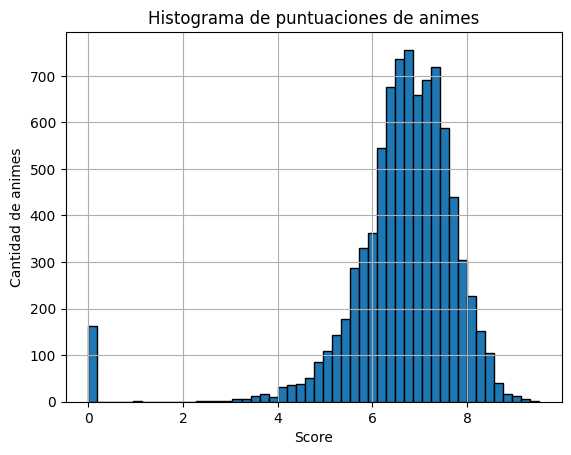

In [108]:
df_merged_dataset["score"].hist(bins=50, edgecolor="black")
plt.xlabel("Score")
plt.ylabel("Cantidad de animes")
plt.title("Histograma de puntuaciones de animes")
plt.show()

18. Muestre la densidad de puntajes para los principales tipos de anime (TV, OVA, Movie)

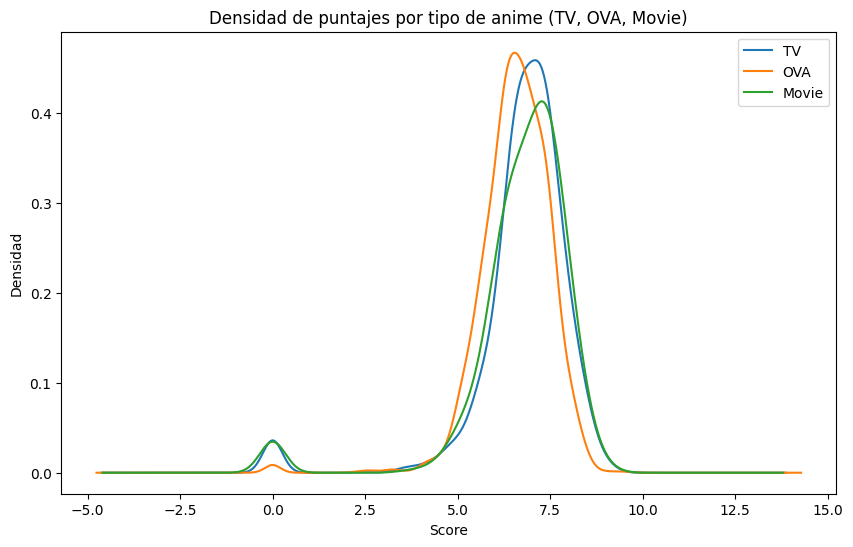

In [109]:
tipos_principales = ["TV", "OVA", "Movie"]
df_filtrado = df_merged_dataset[df_merged_dataset["type"].isin(tipos_principales)]

plt.figure(figsize=(10,6))
for tipo in tipos_principales:
    df_filtrado[df_filtrado["type"] == tipo]["score"].plot(kind="density", label=tipo)

plt.xlabel("Score")
plt.ylabel("Densidad")
plt.title("Densidad de puntajes por tipo de anime (TV, OVA, Movie)")
plt.legend()
plt.show()


19. ¿Cuál tipo de anime es más exitoso? ¿Se está tomando en cuenta la cantidad de animes por tipo al afirmar eso?

R: Como la densidad de animes tipo Movie se concentra hacia puntajes altos significa que suelen recibir mejores calificaciones, por lo tanto parecieran ser más exitosos.

Sin embargo, no se toma en cuenta la cantidad de animes por tipo, solo refleja la calidad promedio y no la cantidad total de animes exitosos.

Y eso es todo por hoy :)


![](https://i.imgur.com/ghKLs78.jpeg)